In [28]:
from openpyxl import load_workbook
from openpyxl import Workbook
from os.path import join
import re
import numpy as np

characterization_folder = "/Users/julionogima/Documents/IBM/Projects/Challenge4739/Data_Sets/Characterization"
yrl_train_file = "FinalTrain_Nheengatu.xlsx"
yrl_test_file = "FinalTest_Nheengatu.xlsx"
mbya_train_file = "Train_Guarani.xlsx"
mbya_test_file = "Test_Guarani.xlsx"

yrl_train_vocab = {}
yrl_train_size = 0
yrl_train_sentence_size = []
yrl_test_vocab = {}
yrl_test_size = 0
yrl_test_sentence_size = []
mbya_train_vocab = {}
mbya_train_size = 0
mbya_train_sentence_size = []
mbya_test_vocab = {}
mbya_test_size = 0
mbya_test_sentence_size = []
yrl_unique_words_not_in_train = []
yrl_words_not_in_train = 0
mbya_unique_words_not_in_train = []
mbya_words_not_in_train = 0

# Analyze Nheengatu Training Set
wb = load_workbook(join(characterization_folder, yrl_train_file), read_only=False)
sheet = wb.active
for i in range(2, sheet.max_row+1):
    sentence_yrl = sheet.cell(row=i, column=2).value
    # remove punctuation
    sentence_yrl = re.sub(r'[^\w\s]', '', sentence_yrl)
    # make it lower case
    sentence_yrl = sentence_yrl.lower()
    words = sentence_yrl.split()
    yrl_train_size = yrl_train_size + len(words)
    yrl_train_sentence_size.append(len(words))
    for word in words:
        if word in yrl_train_vocab:
            count = yrl_train_vocab[word]
            yrl_train_vocab[word] = count + 1
        else:
            yrl_train_vocab[word] = 1

print ("nheengatu training set has", sheet.max_row-1, "sentences")
print ("nheengatu training sentences have in average", round(np.mean(yrl_train_sentence_size),2), "words with std of", round(np.std(yrl_train_sentence_size),2))
print ("nheengatu training set has", yrl_train_size, "words")
print ("nheengatu training set has", len(yrl_train_vocab), "unique words")

# Analyze Nheengatu Test Set
wb = load_workbook(join(characterization_folder, yrl_test_file), read_only=False)
sheet = wb.active
for i in range(2, sheet.max_row+1):
    sentence_yrl = sheet.cell(row=i, column=2).value
    # remove punctuation
    sentence_yrl = re.sub(r'[^\w\s]', '', sentence_yrl)
    # make it lower case
    sentence_yrl = sentence_yrl.lower()
    words = sentence_yrl.split()
    yrl_test_size = yrl_test_size + len(words)
    yrl_test_sentence_size.append(len(words))
    for word in words:
        if word in yrl_test_vocab:
            count = yrl_test_vocab[word]
            yrl_test_vocab[word] = count + 1
        else:
            yrl_test_vocab[word] = 1

print ("nheengatu test set has", sheet.max_row-1, "sentences")
print ("nheengatu test sentences have in average", round(np.mean(yrl_test_sentence_size),2), "words with std of", round(np.std(yrl_test_sentence_size),2))
print ("nheengatu test set has", yrl_test_size, "words")
print ("nheengatu test set has", len(yrl_test_vocab), "unique words")


# Check if all word in the test set are include in the training set
for word in yrl_test_vocab:
    if word not in yrl_train_vocab:
        yrl_unique_words_not_in_train.append(word)
        yrl_words_not_in_train = yrl_words_not_in_train + yrl_test_vocab[word]

print ("number of words of nheengatu in test set that are not in training set:", yrl_words_not_in_train)
print ("unique words of nheengatu in test set that are not in training set:", len(yrl_unique_words_not_in_train))
#print (yrl_words_not_in_train)

print ("")

# Analyze Guarani Mbya Training Set
wb = load_workbook(join(characterization_folder, mbya_train_file), read_only=False)
sheet = wb.active
for i in range(2, sheet.max_row+1):
    sentence_mbya = sheet.cell(row=i, column=2).value
    # remove punctuation
    sentence_mbya = re.sub(r'[^\w\s]', '', sentence_mbya)
    # make it lower case
    sentence_mbya = sentence_mbya.lower()
    words = sentence_mbya.split()
    mbya_train_size = mbya_train_size + len(words)
    mbya_train_sentence_size.append(len(words))
    for word in words:
        if word in mbya_train_vocab:
            count = mbya_train_vocab[word]
            mbya_train_vocab[word] = count + 1
        else:
            mbya_train_vocab[word] = 1

print ("guarani mbya training set has", sheet.max_row-1, "sentences")
print ("guarani mbya training sentences have in average", round(np.mean(mbya_train_sentence_size),2), "words with std of", round(np.std(mbya_train_sentence_size),2))
print ("guarani mbya training set has", mbya_train_size, "words")
print ("guarani mbya training set has", len(mbya_train_vocab), "unique words")

# Analyze Guarani Mbya Test Set
wb = load_workbook(join(characterization_folder, mbya_test_file), read_only=False)
sheet = wb.active
for i in range(2, sheet.max_row+1):
    sentence_mbya = sheet.cell(row=i, column=2).value
    # remove punctuation
    sentence_mbya = re.sub(r'[^\w\s]', '', sentence_mbya)
    # make it lower case
    sentence_mbya = sentence_mbya.lower()
    words = sentence_mbya.split()
    mbya_test_size = mbya_test_size + len(words)
    mbya_test_sentence_size.append(len(words))
    for word in words:
        if word in mbya_test_vocab:
            count = mbya_test_vocab[word]
            mbya_test_vocab[word] = count + 1
        else:
            mbya_test_vocab[word] = 1

print ("guarani mbya test set has", sheet.max_row-1, "sentences")
print ("guarani mbya test sentences have in average", round(np.mean(mbya_test_sentence_size),2), "words with std of", round(np.std(mbya_test_sentence_size),2))
print ("guarani mbya test set has", mbya_test_size, "words")
print ("guarani mbya test set has", len(mbya_test_vocab), "unique words")


# Check if all word in the test set are include in the training set
for word in mbya_test_vocab:
    if word not in mbya_train_vocab:
        mbya_unique_words_not_in_train.append(word)
        mbya_words_not_in_train = mbya_words_not_in_train + mbya_test_vocab[word]

print ("number of words of guarani mbya in test set that are not in training set:", mbya_words_not_in_train)
print ("unique words of guarani mbya in test set that are not in training set:", len(mbya_unique_words_not_in_train))
#print (mbya_words_not_in_train)


nheengatu training set has 6699 sentences
nheengatu training sentences have in average 7.13 words with std of 4.71
nheengatu training set has 47793 words
nheengatu training set has 5786 unique words
nheengatu test set has 233 sentences
nheengatu test sentences have in average 4.61 words with std of 3.32
nheengatu test set has 1073 words
nheengatu test set has 496 unique words
number of words of nheengatu in test set that are not in training set: 113
unique words of nheengatu in test set that are not in training set: 111

guarani mbya training set has 3140 sentences
guarani mbya training sentences have in average 6.82 words with std of 5.5
guarani mbya training set has 21414 words
guarani mbya training set has 3484 unique words
guarani mbya test set has 300 sentences
guarani mbya test sentences have in average 5.92 words with std of 3.48
guarani mbya test set has 1776 words
guarani mbya test set has 623 unique words
number of words of guarani mbya in test set that are not in training se

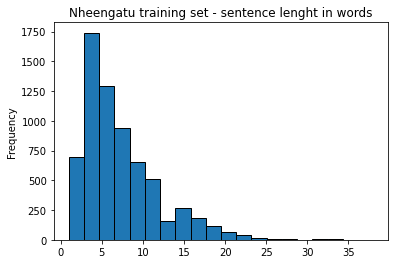

In [34]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(yrl_train_sentence_size)

df[0].plot(kind='hist', title='Nheengatu training set - sentence lenght in words', bins=20, edgecolor='black');



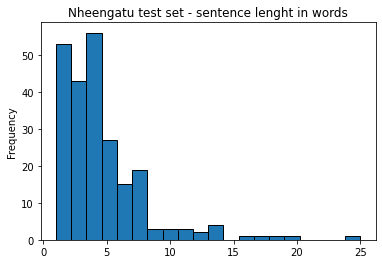

In [35]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(yrl_test_sentence_size)

df[0].plot(kind='hist', title='Nheengatu test set - sentence lenght in words', bins=20, edgecolor='black');



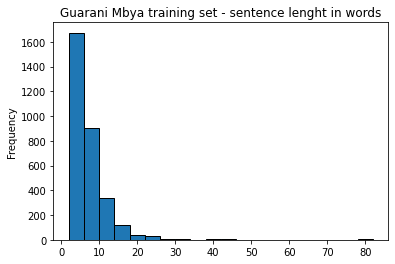

In [40]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(mbya_train_sentence_size)

df[0].plot(kind='hist', title='Guarani Mbya training set - sentence lenght in words', bins=20, edgecolor='black');



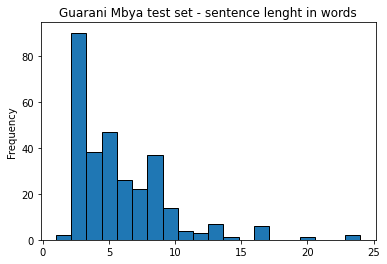

In [41]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(mbya_test_sentence_size)

df[0].plot(kind='hist', title='Guarani Mbya test set - sentence lenght in words', bins=20, edgecolor='black');



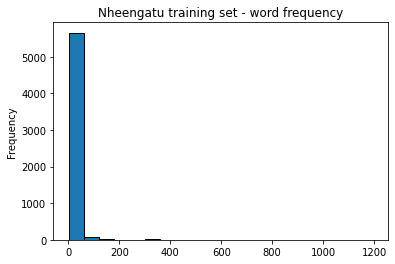

In [50]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(yrl_train_vocab.values())

df[0].plot(kind='hist', title='Nheengatu training set - word frequency', bins=20, edgecolor='black');


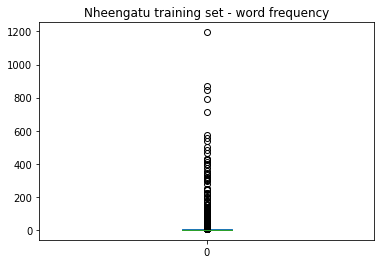

In [49]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(yrl_train_vocab.values())

df[0].plot(kind='box', title='Nheengatu training set - word frequency');


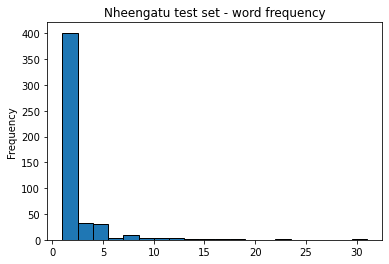

In [51]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(yrl_test_vocab.values())

df[0].plot(kind='hist', title='Nheengatu test set - word frequency', bins=20, edgecolor='black');


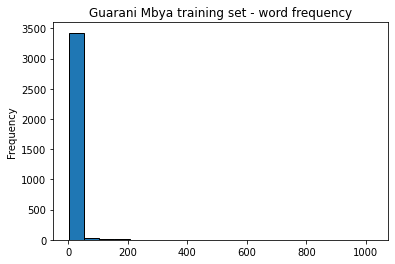

In [52]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(mbya_train_vocab.values())

df[0].plot(kind='hist', title='Guarani Mbya training set - word frequency', bins=20, edgecolor='black');


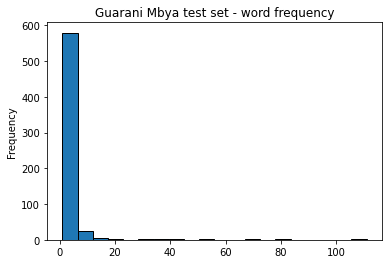

In [53]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(mbya_test_vocab.values())

df[0].plot(kind='hist', title='Guarani Mbya test set - word frequency', bins=20, edgecolor='black');
